<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_Features_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:

This colab is used to do diffirent visualizations of the features of CA Combined and Maryland Data



## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# 1.Load data - Combined CA Data

## 1.1Preprocessed Data

In [85]:
CA_combined_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_alldatasets_Feb05.csv',low_memory=False)
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity
0,2020-03-01,California,6001,0,Alameda County,1671329,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075
1,2020-03-02,California,6001,0,Alameda County,1671329,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075
2,2020-03-03,California,6001,1,Alameda County,1671329,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075
3,2020-03-04,California,6001,0,Alameda County,1671329,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075
4,2020-03-05,California,6001,0,Alameda County,1671329,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075


In [86]:
CA_combined_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_severity                                    float64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
PopDensity                                            float64
dtype: o

## 1.2Labeled  Data

In [87]:
CA_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_CombinedData_Labeled_CDCGuideline_Feb05.csv',low_memory=False)
CA_labeled_data.head()

,Date,Province_State,FIPS,County Name,mask_rule_severity,PopDensity,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Cases/100k population,rolling_avg_new_cases/100k,New cases,growth_label
0,2020-03-01,California,6001,Alameda County,0.0,860.757075,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,0.000000,0.0,0.0,minimal
1,2020-03-02,California,6001,Alameda County,0.0,860.757075,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,0.000000,0.0,0.0,minimal
2,2020-03-03,California,6001,Alameda County,0.0,860.757075,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,0.059833,0.0,1.0,minimal
3,2020-03-04,California,6001,Alameda County,0.0,860.757075,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,0.000000,0.0,0.0,minimal
4,2020-03-05,California,6001,Alameda County,0.0,860.757075,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,0.000000,0.0,0.0,minimal


In [88]:
CA_labeled_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
County Name                                            object
mask_rule_severity                                    float64
PopDensity                                            float64
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
New Case

In [89]:
CA_labeled_data.shape

(15821, 20)

## Preprocessing data 

* drop na
* convert categorical code

In [90]:
CA_combined_data = CA_combined_data.dropna()

In [91]:
CA_combined_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_severity                                    float64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
PopDensity                                            float64
dtype: o

In [92]:
CA_combined_data.shape

(10478, 16)

# Visualization: Combined Data

## Filter data

In [93]:
CA_combined_data.Date.unique()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

In [94]:
date_list = ['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
       '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
       '2020-12-09', '2020-12-10', '2020-12-19', '2020-12-20',
       '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
       '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
       '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05']
CA_combined_data_filtered= CA_combined_data[CA_combined_data.Date.isin(date_list)]
CA_labeled_data_filtered = CA_labeled_data[CA_labeled_data.Date.isin(date_list)]

In [95]:
CA_combined_data_filtered = CA_combined_data_filtered[['FIPS','mask_rule_severity','PopDensity','population','m50','m50_index','Date',
                                              'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                                              'residential_percent_change_from_baseline','New cases']]

In [96]:
#visualization with population density
X3_cols = ['PopDensity','m50_index','mask_rule_severity',
           'New Cases/100k population']



In [97]:
date_list = ['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
       '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-09',
       '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13',
       '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
       '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
       '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
       '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
       '2020-10-30', '2020-10-31']


CA_labeled_data_filtered = CA_labeled_data[CA_labeled_data.Date.isin(date_list)]

In [98]:
CA_labeled_data_filtered.columns

Index(['Date', 'Province_State', 'FIPS', 'County Name', 'mask_rule_severity',
       'PopDensity', 'population', 'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'New Cases/100k population',
       'rolling_avg_new_cases/100k', 'New cases', 'growth_label'],
      dtype='object')

['minimal' 0 'moderate' 1 'substantial' 2 'widespread' 3]

In [99]:
CA_labeled_data_filtered['growth_label'].unique()

array(['substantial', 'moderate', 'minimal', 'widespread'], dtype=object)

In [100]:
CA_labeled_data_filtered['County Name'].unique()

array(['Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Mono County', 'Monterey County', 'Napa County',
       'Nevada County', 'Orange County', 'Placer County', 'Plumas County',
       'Riverside County', 'Sacramento County', 'San Benito County',
       'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Siskiyou County', 'Solano County',
       'Sonoma County', 'Stanislaus County', 'Su

In [101]:
CA_labeled_data_level0 = CA_labeled_data_filtered[(CA_labeled_data_filtered['growth_label']=='minimal') ]
print(CA_labeled_data_level0.shape)
CA_labeled_data_level0['County Name'].unique()

(63, 20)


array(['Amador County', 'Calaveras County', 'Humboldt County',
       'Lassen County', 'Mariposa County', 'Plumas County',
       'Siskiyou County', 'Tuolumne County'], dtype=object)

In [102]:
CA_labeled_data_level0 = CA_labeled_data_filtered[(CA_labeled_data_filtered['growth_label']=='minimal') & (CA_labeled_data_filtered['County Name']== 'Amador County')]
print(CA_labeled_data_level0.shape)

CA_labeled_data_level3 = CA_labeled_data_filtered[(CA_labeled_data_filtered['growth_label']=='widespread') & (CA_labeled_data_filtered['County Name']== 'Amador County')]
print(CA_labeled_data_level3.shape)

(5, 20)
(4, 20)


## ***Correlation Plot

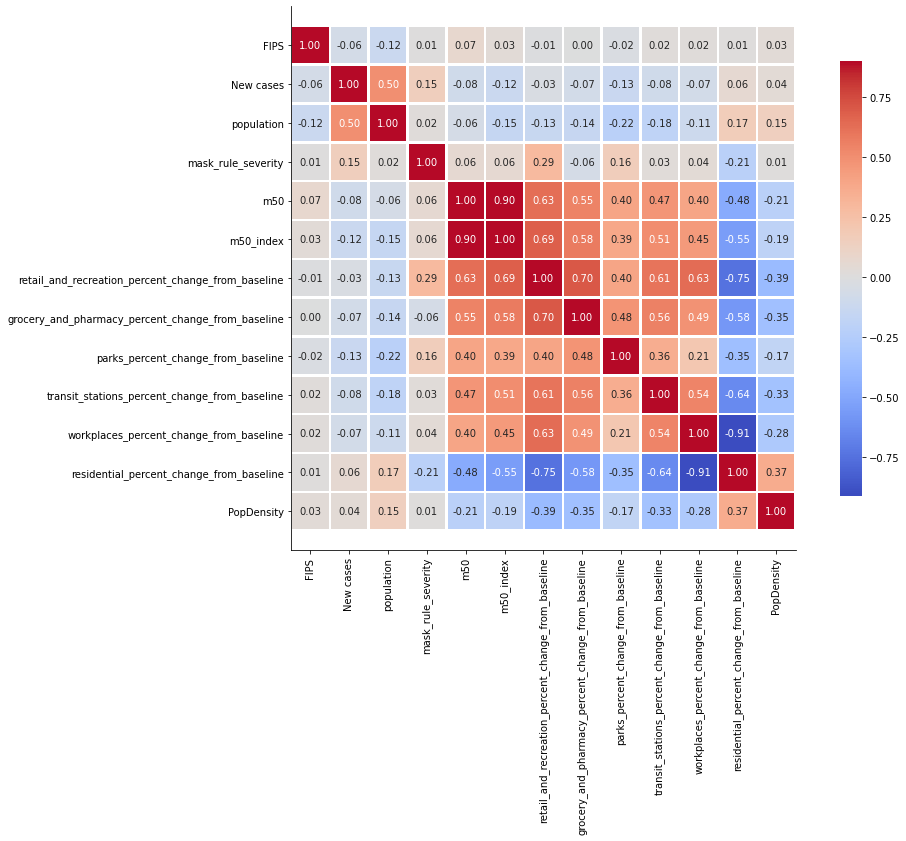

In [103]:

corr = CA_combined_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

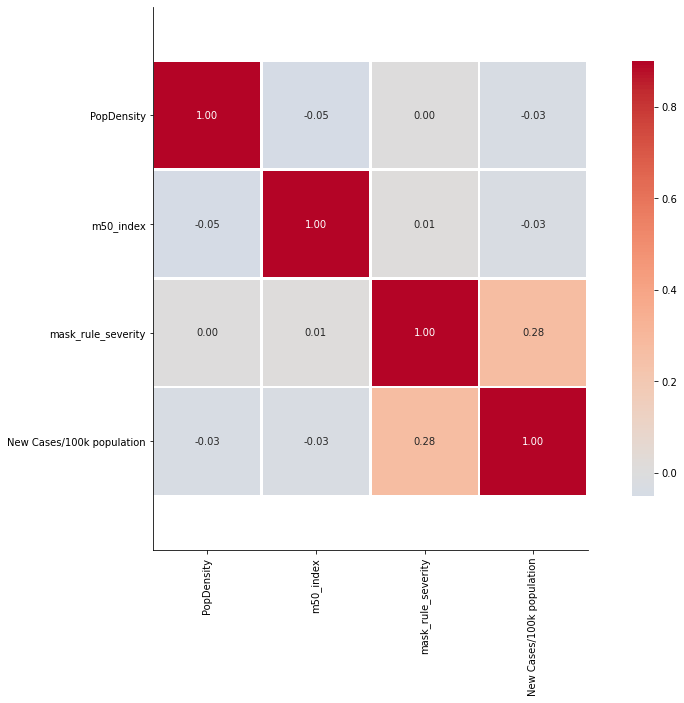

In [104]:
corr = CA_labeled_data[X3_cols].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## ***Pair Plot- Mask Rule Severity

https://seaborn.pydata.org/generated/seaborn.pairplot.html

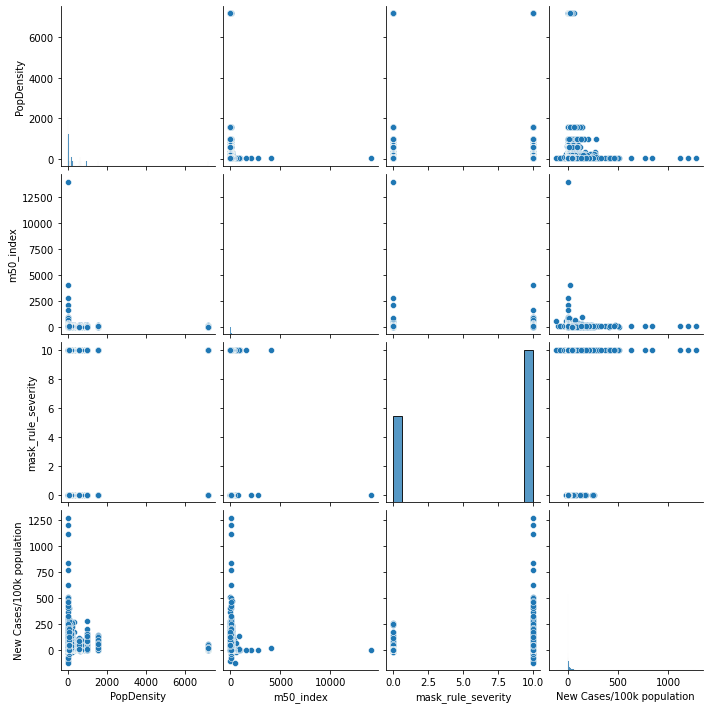

In [105]:
sns.pairplot(CA_labeled_data[X3_cols])

## Box Plot

https://machinelearningmastery.com/time-series-data-visualization-with-python/

##  TODO: Let's filter mobility, SD separately, and do the box plot - drop FIPS

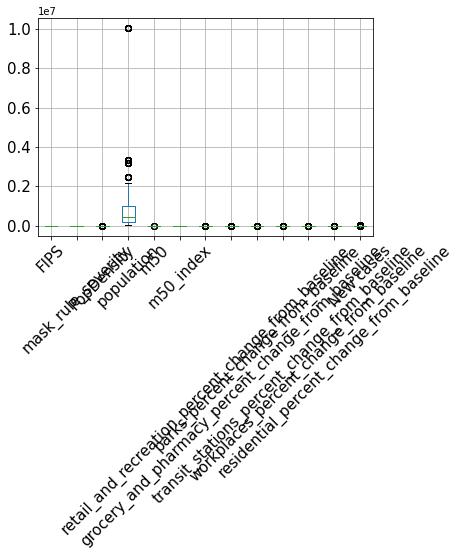

In [106]:
CA_combined_data_filtered.boxplot(grid=True, rot=45, fontsize=15)

## For paper visualization

* Let's filter the SuperSpread data and do Box plot
* Let's filter the lowspread data and do box plot
* filter dataframe for transition from low -> superspread data and plot lineplot to see variation 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f26cb2e10>,
      dtype=object)

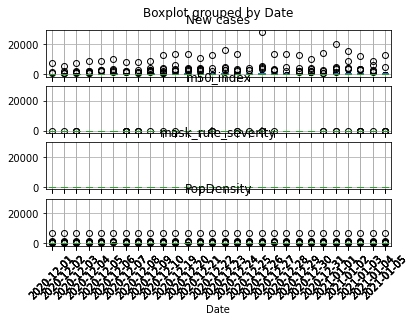

In [107]:
CA_combined_data_filtered.boxplot(column=['New cases', 'm50_index','mask_rule_severity','PopDensity'], by='Date',rot=45,
                     layout=(4, 1))

## Histogram

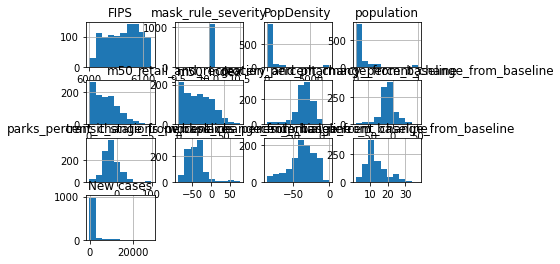

In [114]:
CA_combined_data_filtered.hist()
plt.show()

## BarPlot

#### Other

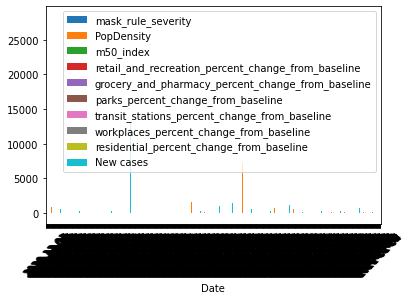

In [109]:
CA_combined_data_filtered.plot(x="Date", y=['mask_rule_severity','PopDensity', 'm50_index',
                                              'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                                              'residential_percent_change_from_baseline','New cases'],rot=45, kind="bar")

#### ***With Mask Score Severity

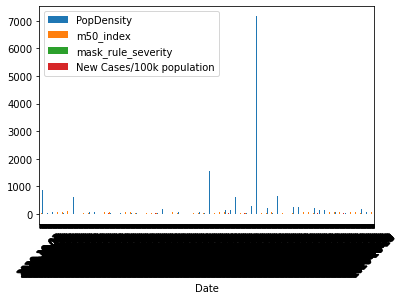

In [115]:
CA_labeled_data_filtered.plot(x="Date", y=X3_cols,rot=45, kind="bar")

## Line Plot

#### ***Mask Rule and Population Density

In [ ]:
CA_labeled_data.columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data.plot(kind='line',x='Date',y='PopDensity',color='green',ax=ax)
CA_labeled_data.plot(kind='line',x='Date',y='m50_index', color='blue', ax=ax)
CA_labeled_data.plot(kind='line',x='Date',y='mask_rule_severity', color='yellow', ax=ax)
CA_labeled_data.plot(kind='line',x='Date',y='New Cases/100k population', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data.plot(kind='line',x='Date',y='PopDensity',color='green',ax=ax)
CA_labeled_data.plot(kind='line',x='Date',y='m50_index', color='blue', ax=ax)
CA_labeled_data.plot(kind='line',x='Date',y='mask_rule_severity', color='yellow', ax=ax)
#CA_labeled_data.plot(kind='line',x='Date',y='New Cases/100k population', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 1.'New Cases/100k population': Minimal vs. Widespread

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='New Cases/100k population',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='New Cases/100k population', color='red', ax=ax)

plt.show()

#### 2.m50_index: Minimal vs. Widespread

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='m50_index',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='m50_index', color='red', ax=ax)

plt.show()

#### 3.mask_rule_active: Minimal vs. Widespread

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='mask_rule_active',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='mask_rule_active', color='red', ax=ax)

plt.show()

#### 4.grocery_and_pharmacy_percent_change_from_baseline: Minimal vs. Widespread

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='grocery_and_pharmacy_percent_change_from_baseline',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='grocery_and_pharmacy_percent_change_from_baseline', color='red', ax=ax)

plt.show()

#### ***5.mask_rule_severity: Minimal vs. Widespread

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='mask_rule_severity',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='mask_rule_severity', color='red', ax=ax)

plt.show()

## Time Series Based Plots- with All County

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [ ]:
CA_combined_data_filtered_new = CA_labeled_data_filtered

In [ ]:
CA_combined_data_filtered.dtypes

In [ ]:
CA_combined_data_filtered_new['Date'] =  pd.to_datetime(CA_combined_data_filtered_new['Date'], format='%Y/%m/%d')

In [ ]:
CA_combined_data_filtered_new = CA_combined_data_filtered_new.set_index('Date')
CA_combined_data_filtered_new.head(3)

In [ ]:
CA_combined_data_filtered_new.index

In [ ]:
# Display a random sampling of 5 rows
CA_combined_data_filtered_new.sample(5, random_state=0)

In [ ]:
CA_combined_data_filtered_new.loc['2021-01-01':'2021-01-03']

In [ ]:
CA_combined_data_filtered_new.columns

In [ ]:
CA_labeled_data_level0 = CA_combined_data_filtered_new[(CA_combined_data_filtered_new['growth_label']=='minimal')]# & (CA_combined_data_filtered_new['County Name']== 'Amador County')]
print(CA_labeled_data_level0.shape)

CA_labeled_data_level3 = CA_combined_data_filtered_new[(CA_combined_data_filtered_new['growth_label']=='widespread')]# & (CA_combined_data_filtered_new['County Name']== 'Amador County')]
print(CA_labeled_data_level3.shape)

### Daily Trend

In [ ]:
cols_plot = ['mask_rule_active','m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population']
axes = CA_labeled_data_level0[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

In [ ]:
cols_plot = ['mask_rule_active','m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population']
axes = CA_labeled_data_level3[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

### Seasonality

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population'], axes):
  sns.boxplot(data=CA_labeled_data_level0, x='FIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population'], axes):
  sns.boxplot(data=CA_labeled_data_level3, x='FIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

### Box Plot

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=CA_labeled_data_level0, x='FIPS', y='m50_index')
plt.xticks(rotation=45)

In [ ]:
sns.boxplot(data=CA_labeled_data_level3, x='FIPS', y='m50_index')
plt.xticks(rotation=45)

### Resampling

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['m50_index','transit_stations_percent_change_from_baseline','New cases']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = CA_combined_data_filtered_new[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

In [ ]:
# Start and end of the date range to extract
start, end = '2020-12-05', '2020-12-10'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(CA_combined_data_filtered_new.loc[start:end, 'm50_index'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'm50_index'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('m50_index')
ax.legend();
plt.xticks(rotation=45)

In [ ]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = CA_combined_data_filtered_new[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_monthly['New cases'], color='black', label='New cases')
opsd_monthly[['m50_index', 'transit_stations_percent_change_from_baseline']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total ');

# 2.Load data - Maryland Inertia Data

## 2.1Preprocessed Data

In [13]:
CA_inertia_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_processedMarylandData_Feb05.csv',low_memory=False)
CA_inertia_data.head()

,index,State_Name,PopDensity,countyFIPS,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,mask_rule_severity
0,67518,California,860.757075,6001,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0
1,67519,California,860.757075,6001,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0
2,67520,California,860.757075,6001,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0
3,67521,California,860.757075,6001,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0
4,67522,California,860.757075,6001,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0,0.0


In [14]:
CA_inertia_data.dtypes

index                                       int64
State_Name                                 object
PopDensity                                float64
countyFIPS                                  int64
County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64


In [15]:
CA_inertia_data.mask_rule_severity.unique

<bound method Series.unique of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
21049    10.0
21050    10.0
21051    10.0
21052    10.0
21053    10.0
Name: mask_rule_severity, Length: 21054, dtype: float64>

## 2.2Labeled  Data

In [16]:
CA_inertia_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_MarylandData_Labeled_CDCGuideline_Feb05.csv',low_memory=False)
CA_inertia_labeled_data.head()

,County Name,State,mask_rule_severity,PopDensity,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,index,State_Name,countyFIPS,growth_label
0,Alameda County,CA,0.0,860.757075,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,67518.0,California,6001.0,minimal
1,Alameda County,CA,0.0,860.757075,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,67519.0,California,6001.0,minimal
2,Alameda County,CA,0.0,860.757075,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,67520.0,California,6001.0,minimal
3,Alameda County,CA,0.0,860.757075,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,67521.0,California,6001.0,minimal
4,Alameda County,CA,0.0,860.757075,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0,0.0,0.0,67522.0,California,6001.0,minimal


In [17]:
CA_inertia_labeled_data.mask_rule_severity.unique

<bound method Series.unique of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
21049    10.0
21050    10.0
21051    10.0
21052    10.0
21053    10.0
Name: mask_rule_severity, Length: 21054, dtype: float64>

In [18]:
CA_inertia_labeled_data.dtypes

County Name                                object
State                                      object
mask_rule_severity                        float64
PopDensity                                float64
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object


In [19]:
CA_inertia_labeled_data.shape

(21054, 54)

## Preprocessing data 

* drop na
* convert categorical code

In [20]:
CA_inertia_labeled_data = CA_inertia_labeled_data.fillna(0)

In [21]:
CA_inertia_labeled_data.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.peop

# Visualization: Maryland Data

## Filter data

In [32]:
CA_inertia_labeled_data.date.unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

In [33]:
date_list = ['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
       '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-09',
       '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13',
       '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
       '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
       '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
       '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
       '2020-10-30', '2020-10-31']


CA_inertia_labeled_data_filtered = CA_inertia_labeled_data[CA_inertia_labeled_data.date.isin(date_list)]

In [34]:
CA_inertia_labeled_data_filtered.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.peop

['minimal' 0 'moderate' 1 'substantial' 2 'widespread' 3]

In [35]:
CA_inertia_labeled_data_filtered['growth_label'].unique()

array(['substantial', 'moderate', 'minimal', 'widespread'], dtype=object)

In [36]:
CA_inertia_labeled_data_filtered['CTNAME'].unique()

array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

In [37]:
CA_inertia_labeled_data_filtered_level0 = CA_inertia_labeled_data_filtered[(CA_inertia_labeled_data_filtered['growth_label']=='minimal') ]
print(CA_inertia_labeled_data_filtered_level0.shape)
CA_inertia_labeled_data_filtered_level0['County Name'].unique()

(135, 54)


array(['Alpine County', 'Amador County', 'Calaveras County',
       'Humboldt County', 'Lassen County', 'Mariposa County',
       'Modoc County', 'Plumas County', 'Sierra County',
       'Siskiyou County', 'Trinity County', 'Tuolumne County'],
      dtype=object)

In [38]:
CA_inertia_labeled_data_filtered_level0 = CA_inertia_labeled_data_filtered[(CA_inertia_labeled_data_filtered['growth_label']=='minimal') & (CA_inertia_labeled_data_filtered['County Name']== 'Amador County')]
print(CA_inertia_labeled_data_filtered_level0.shape)

CA_inertia_labeled_data_filtered_level3 = CA_inertia_labeled_data_filtered[(CA_inertia_labeled_data_filtered['growth_label']=='widespread') & (CA_inertia_labeled_data_filtered['County Name']== 'Amador County')]
print(CA_inertia_labeled_data_filtered_level3.shape)

(5, 54)
(4, 54)


In [39]:
#social distancing
X1_cols = ['Social.distancing.index','New.cases.1000.people']

#mobility
X2_cols = ['X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person','Transit.mode.share','X..working.from.home','New.cases.1000.people']

#visualization with population density
X3_cols = ['PopDensity','Social.distancing.index','Median.income','Unemployment.claims.1000.people',
           'X..African.Americans','X..Hispanic.Americans', 'X..Male','X..people.older.than.60','mask_rule_severity',
           'New.cases.1000.people']

#after the result of coorplot on x3
X4_cols = ['PopDensity','Social.distancing.index','Median.income',
           'X..African.Americans','mask_rule_severity',
           'New.cases.1000.people']

## Correlation Plot

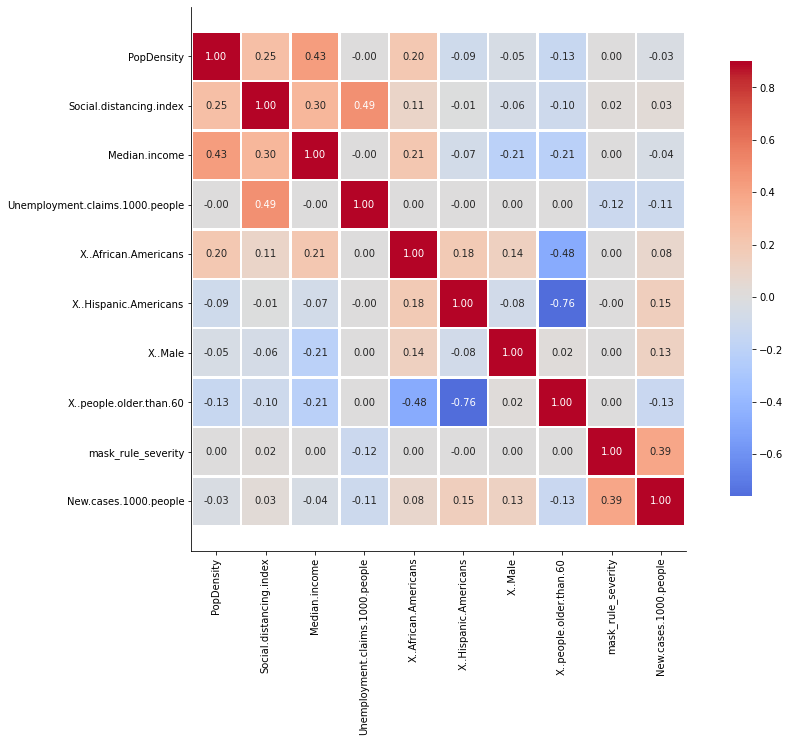

In [40]:

corr = CA_inertia_labeled_data[X3_cols].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

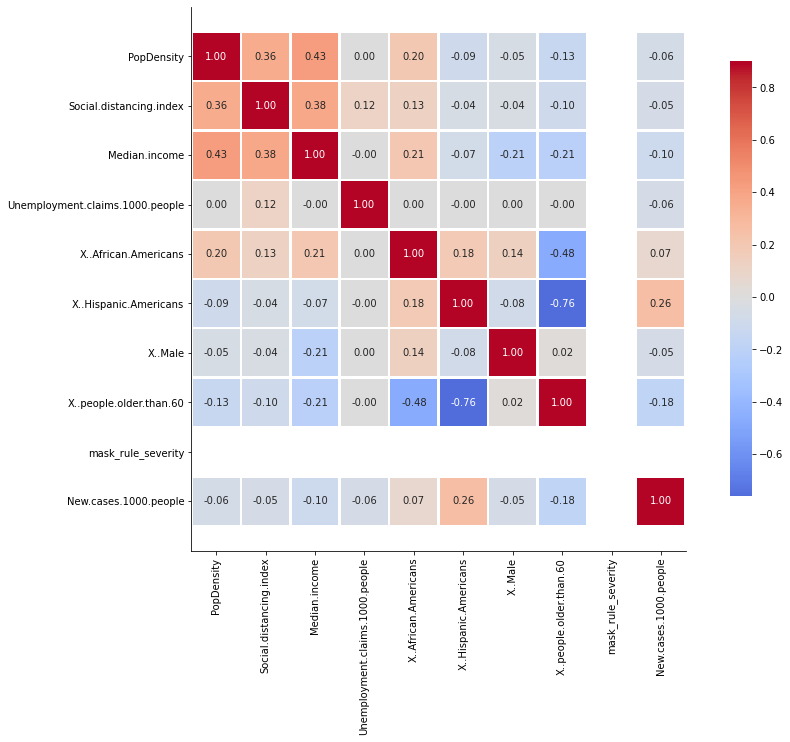

In [41]:

corr = CA_inertia_labeled_data_filtered[X3_cols].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## ***Pair Plot- Mask Rule Severity

https://seaborn.pydata.org/generated/seaborn.pairplot.html

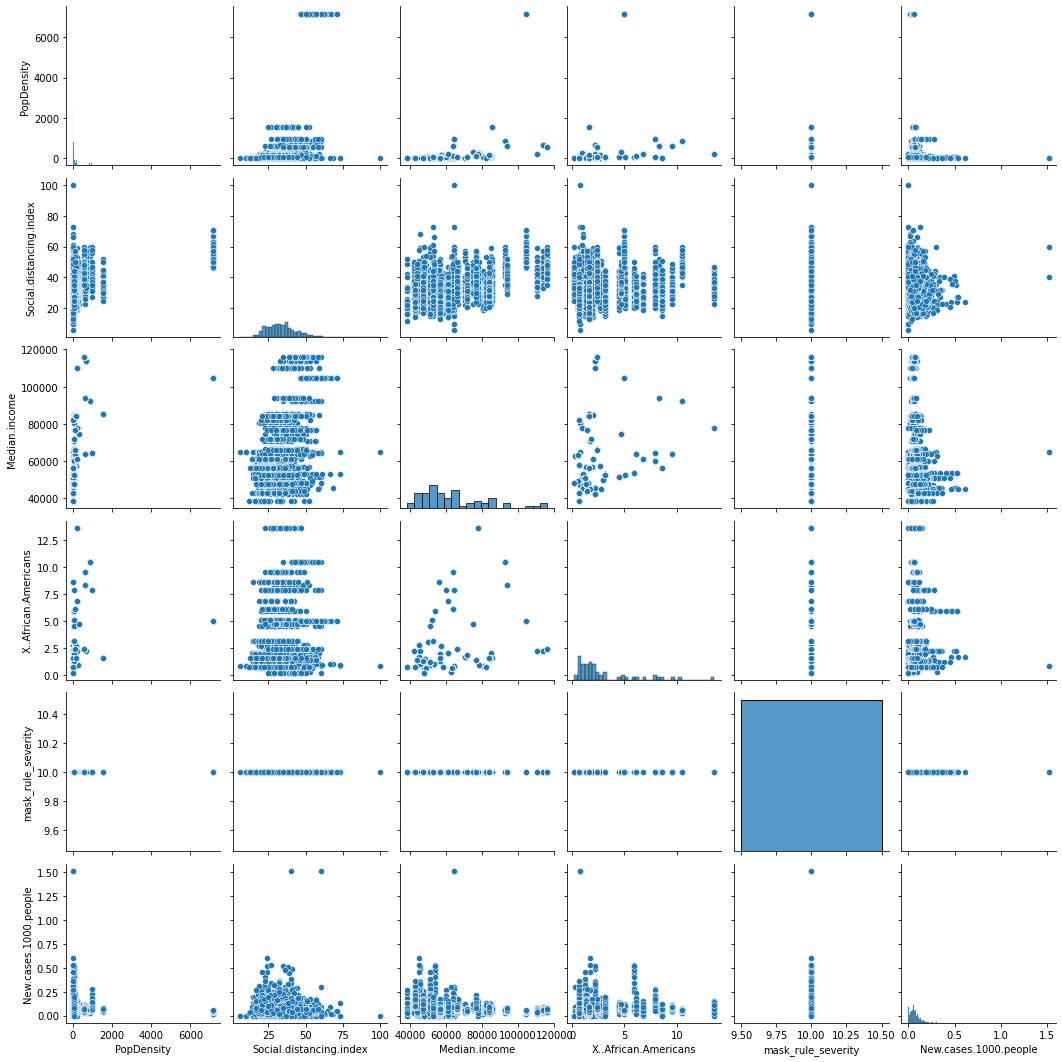

In [42]:
sns.pairplot(CA_inertia_labeled_data_filtered[X4_cols])

## BarPlot

#### ***With Mask Score Severity

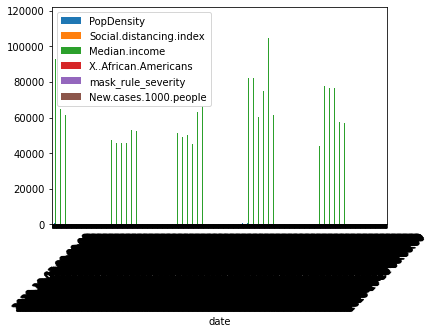

In [84]:
#CA_inertia_labeled_data_filtered[X4_cols]
CA_inertia_labeled_data_filtered.plot(x="date", y=X4_cols,rot=45, kind="bar")  

## Box Plot

https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [43]:
CA_inertia_labeled_data_filtered.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.peop

### CA Maryland Filterted - Social Distancing

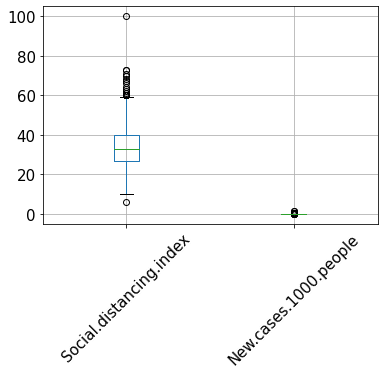

In [44]:
CA_inertia_labeled_data_filtered.boxplot(grid=True, rot=45, fontsize=15, column=X1_cols)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f39d05fd0>,
      dtype=object)

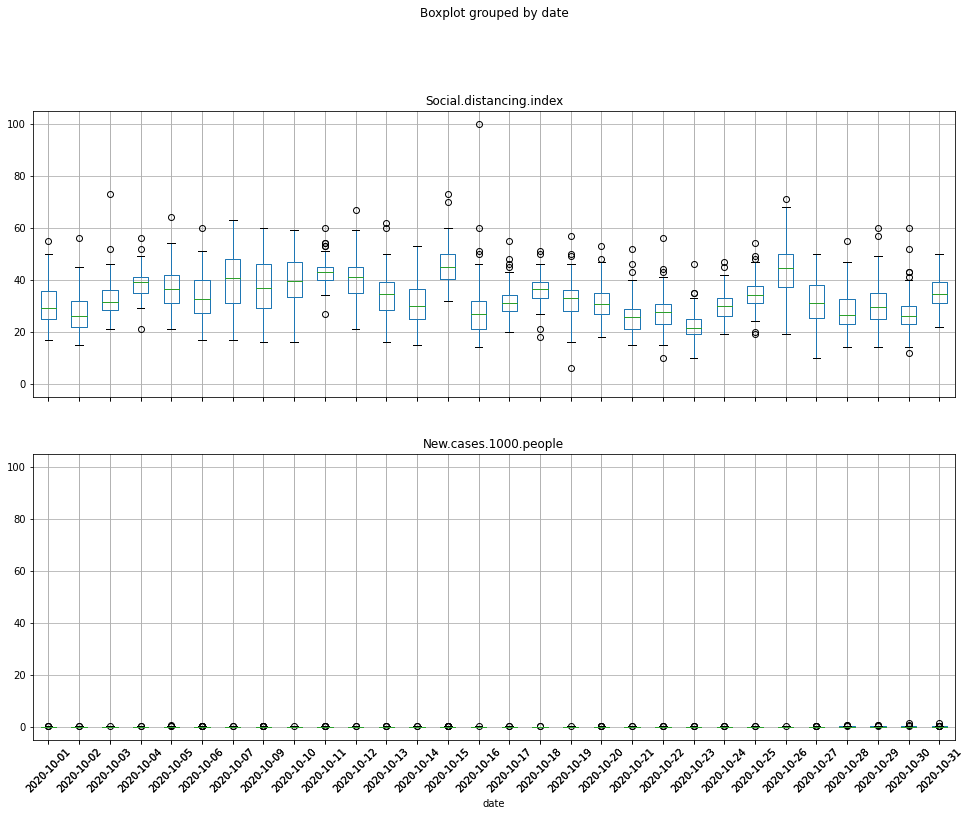

In [45]:
CA_inertia_labeled_data_filtered.boxplot(column=X1_cols, by='date',rot=45,figsize=(16, 18),
                     layout=(3, 1))

### CA Maryland Filterted - Mobility

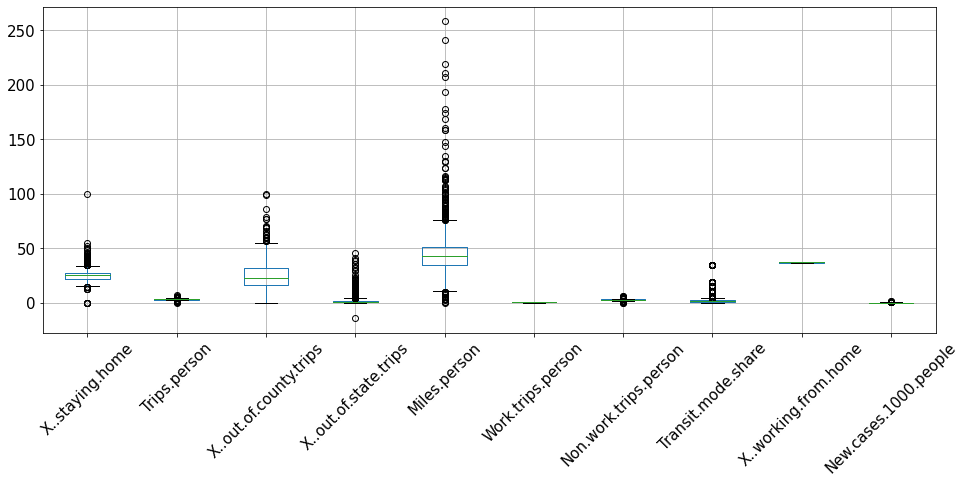

In [46]:
plt.figure(figsize=(16, 6))
CA_inertia_labeled_data_filtered.boxplot(grid=True, rot=45, fontsize=15, column=X2_cols)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f39514860>,
      dtype=object)

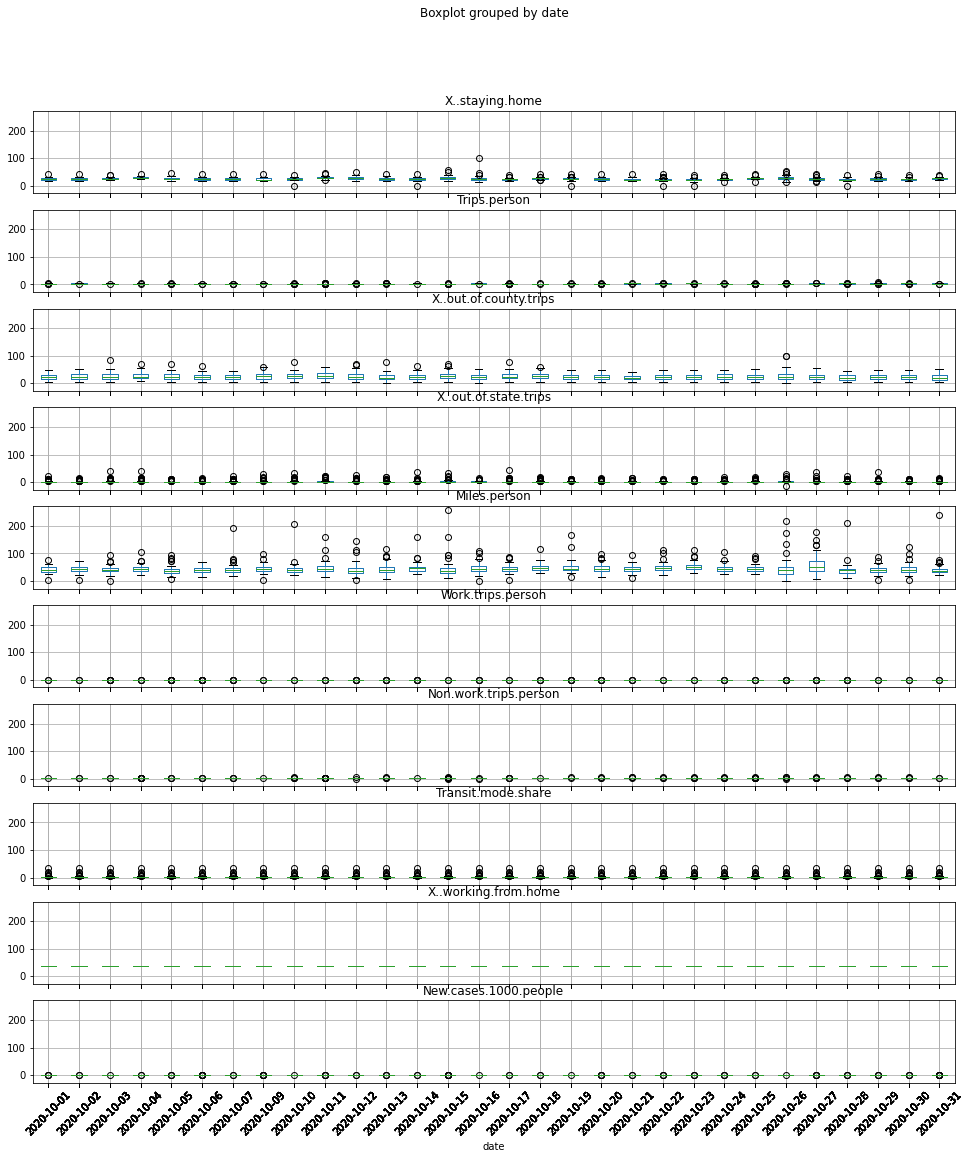

In [47]:
#plt.figure(figsize=(5, 6))
CA_inertia_labeled_data_filtered.boxplot(column=X2_cols, by='date',rot=45,figsize=(16, 18),
                     layout=(10, 1))


## For paper visualization

* Let's filter the SuperSpread data and do Box plot
* Let's filter the lowspread data and do box plot
* filter dataframe for transition from low -> superspread data and plot lineplot to see variation 

## Line Plot

In [48]:
CA_inertia_labeled_data_filtered.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.peop

### ***Population Density: 

In [49]:
CA_inertia_labeled_data_filtered.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.peop

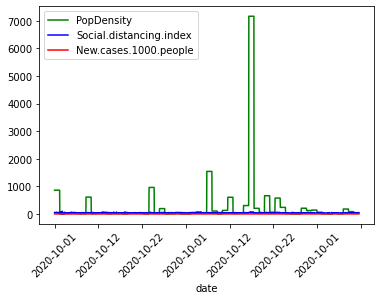

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered.plot(kind='line',x='date',y='PopDensity',color='green',ax=ax)
CA_inertia_labeled_data_filtered.plot(kind='line',x='date',y='Social.distancing.index', color='blue', ax=ax)
CA_inertia_labeled_data_filtered.plot(kind='line',x='date',y='New.cases.1000.people', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

### ***Mask Rule Severity Score: 

In [51]:
CA_inertia_labeled_data_filtered.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.peop

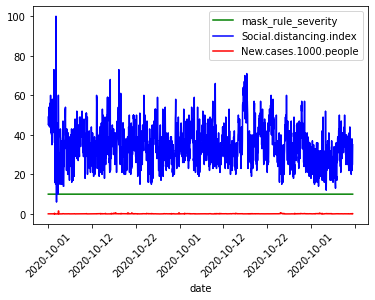

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered.plot(kind='line',x='date',y='mask_rule_severity',color='green',ax=ax)
CA_inertia_labeled_data_filtered.plot(kind='line',x='date',y='Social.distancing.index', color='blue', ax=ax)
CA_inertia_labeled_data_filtered.plot(kind='line',x='date',y='New.cases.1000.people', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

### CDC-Minimal vs. Widespread

#### 1.'New Cases/100k population': Minimal vs. Widespread

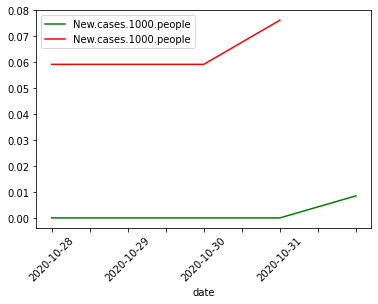

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='New.cases.1000.people',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='New.cases.1000.people', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 2.Social.distancing.index: Minimal vs. Widespread

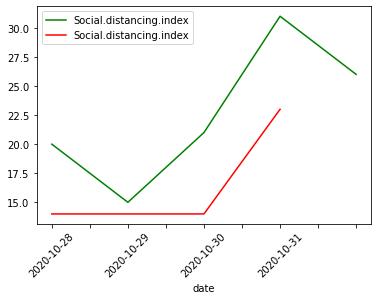

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='Social.distancing.index',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='Social.distancing.index', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 3.X..staying.home: Minimal vs. Widespread

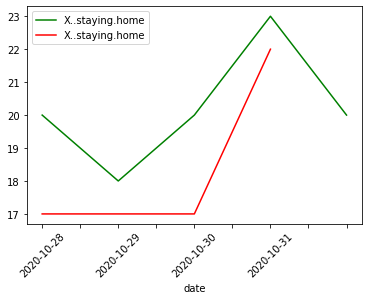

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='X..staying.home',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='X..staying.home', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 4.Trips.person: Minimal vs. Widespread

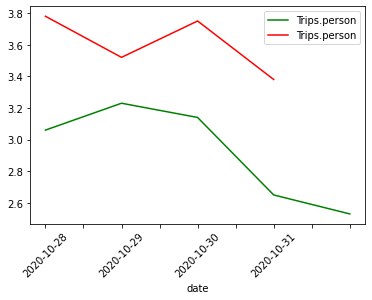

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='Trips.person',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='Trips.person', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 5.Transit.mode.share: Minimal vs. Widespread

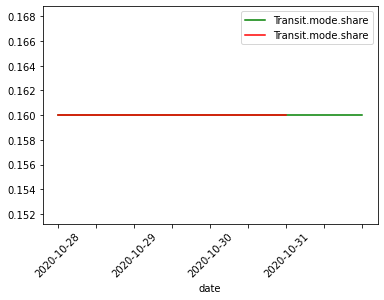

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='Transit.mode.share',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='Transit.mode.share', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 6.X..working.from.home: Minimal vs. Widespread

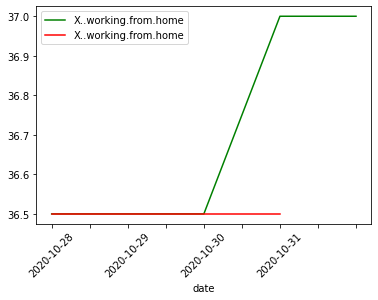

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='X..working.from.home',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='X..working.from.home', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

#### 7.***mask_rule_severity: Minimal vs. Widespread

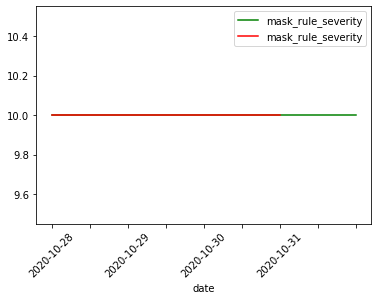

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_inertia_labeled_data_filtered_level0.plot(kind='line',x='date',y='mask_rule_severity',color='green',ax=ax)
CA_inertia_labeled_data_filtered_level3.plot(kind='line',x='date',y='mask_rule_severity', color='red', ax=ax)
plt.xticks(rotation=45)
plt.show()

## Time Series Based Plots- with All County- with All County

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [60]:
CA_combined_data_filtered_new = CA_inertia_labeled_data_filtered

In [61]:
CA_combined_data_filtered_new.dtypes

County Name                                object
State                                      object
mask_rule_severity                        float64
PopDensity                                float64
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object


In [62]:
CA_combined_data_filtered_new['date'] =  pd.to_datetime(CA_combined_data_filtered_new['date'], format='%Y/%m/%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
CA_combined_data_filtered_new = CA_combined_data_filtered_new.set_index('date')
CA_combined_data_filtered_new.head(3)

,County Name,State,mask_rule_severity,PopDensity,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,index,State_Name,countyFIPS,growth_label
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,Alameda County,CA,10.0,860.757075,1671329,6001,Alameda County,6,49,32,2.74,26.2,0.4,26.0,0.34,2.40,75,1666753,-15.0,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0436,2.63,4,58.053447,5.5,373.43,9.37,357,2178,13.99,196,5.7,9.9,36.5,1.71,2.89,4.487447,4.333591,67792.0,California,6001.0,substantial
2020-10-02,Alameda County,CA,10.0,860.757075,1671329,6001,Alameda County,6,45,30,2.94,25.4,0.4,26.8,0.34,2.60,50,1666753,-7.9,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0370,2.59,5,58.050165,5.5,375.87,9.13,355,2165,14.07,196,5.7,9.9,36.5,1.71,2.88,2.991631,4.102809,67793.0,California,6001.0,substantial
2020-10-03,Alameda County,CA,10.0,860.757075,1671329,6001,Alameda County,6,46,30,2.97,24.3,0.2,27.3,0.23,2.74,113,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0476,2.56,6,58.040850,5.5,379.17,9.03,352,2090,14.15,196,5.7,9.9,36.5,1.71,2.88,6.761087,4.145546,67794.0,California,6001.0,substantial


In [64]:
CA_combined_data_filtered_new.index

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-09',
               '2020-10-10', '2020-10-11',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='date', length=1740, freq=None)

In [65]:
# Display a random sampling of 5 rows
CA_combined_data_filtered_new.sample(5, random_state=0)

,County Name,State,mask_rule_severity,PopDensity,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,index,State_Name,countyFIPS,growth_label
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-22,Tulare County,CA,10.0,36.852656,466195,6107,Tulare County,6,23,21,3.45,14.9,0.2,49.3,0.53,2.93,48,465861,-3.3,0.71,16,47518,1.3,64.1,50.00,95,31,79,2.05,0.22,0.0,0.1753,2.49,7,57.870458,5.1,438.83,8.69,308,386,15.37,217,3.8,9.1,37.1,1.71,2.84,10.296121,10.725126,87052.0,California,6107.0,widespread
2020-10-11,Santa Clara County,CA,10.0,574.838370,1927852,6085,Santa Clara County,6,51,35,2.56,16.4,0.5,37.0,0.20,2.35,136,1937570,-16.9,4.32,18,116178,2.4,25.8,50.49,1474,769,132,2.05,0.22,0.0,0.0690,2.48,0,57.976388,5.3,405.67,8.43,321,1451,14.63,203,4.0,9.2,37.0,1.71,2.86,7.054483,5.298273,83048.0,California,6085.0,substantial
2020-10-14,Yuba County,CA,10.0,46.119104,78668,6115,Yuba County,6,22,20,3.19,46.7,0.4,48.0,0.35,2.84,3,78041,1.1,0.94,17,52624,3.1,27.8,50.96,117,27,76,2.05,0.22,0.0,0.0513,2.48,2,57.914616,5.2,415.24,8.64,315,226,14.73,210,4.0,9.2,37.0,1.71,2.87,3.813495,5.084660,88496.0,California,6115.0,substantial
2020-10-13,Colusa County,CA,10.0,7.201880,21547,6011,Colusa County,6,29,30,3.60,39.6,1.5,58.8,0.67,2.93,0,21627,-1.6,0.36,19,56704,1.3,59.0,51.83,19,7,109,2.05,0.22,0.0,0.0000,2.47,18,57.930490,5.2,412.92,8.58,316,50,14.71,210,4.0,9.2,37.0,1.71,2.86,0.000000,2.652010,69619.0,California,6011.0,moderate
2020-10-12,Lassen County,CA,10.0,2.651421,30573,6035,Lassen County,6,36,25,2.22,33.1,14.0,66.7,0.51,1.70,0,30802,-35.0,0.37,19,56362,8.6,18.7,66.29,7,2,86,2.05,0.22,0.0,0.0108,2.45,0,57.957323,5.2,409.32,8.44,318,40,14.68,203,4.0,9.2,37.0,1.71,2.86,0.000000,4.205391,73974.0,California,6035.0,substantial


In [66]:
CA_combined_data_filtered_new.loc['2021-01-01':'2021-01-03']

,County Name,State,mask_rule_severity,PopDensity,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,index,State_Name,countyFIPS,growth_label
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [67]:
CA_combined_data_filtered_new.columns

Index(['County Name', 'State', 'mask_rule_severity', 'PopDensity',
       'population', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
   

In [68]:
CA_inertia_labeled_data_filtered_level0 = CA_combined_data_filtered_new[(CA_combined_data_filtered_new['growth_label']=='minimal')]# & (CA_combined_data_filtered_new['County Name']== 'Amador County')]
print(CA_inertia_labeled_data_filtered_level0.shape)

CA_inertia_labeled_data_filtered_level3 = CA_combined_data_filtered_new[(CA_combined_data_filtered_new['growth_label']=='widespread')]# & (CA_combined_data_filtered_new['County Name']== 'Amador County')]
print(CA_inertia_labeled_data_filtered_level3.shape)

(135, 53)
(757, 53)


### Daily Trend

#### Social Distancing Columns: Minimal vs. Widespread

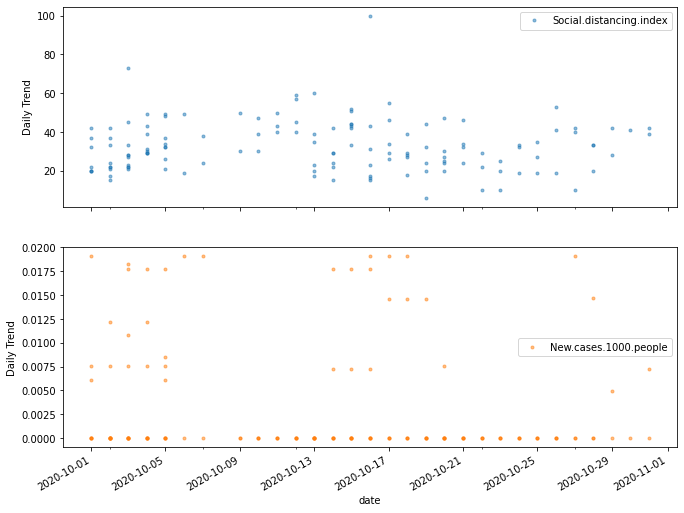

In [69]:
#social distancing columns
cols_plot = X1_cols
axes = CA_inertia_labeled_data_filtered_level0[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

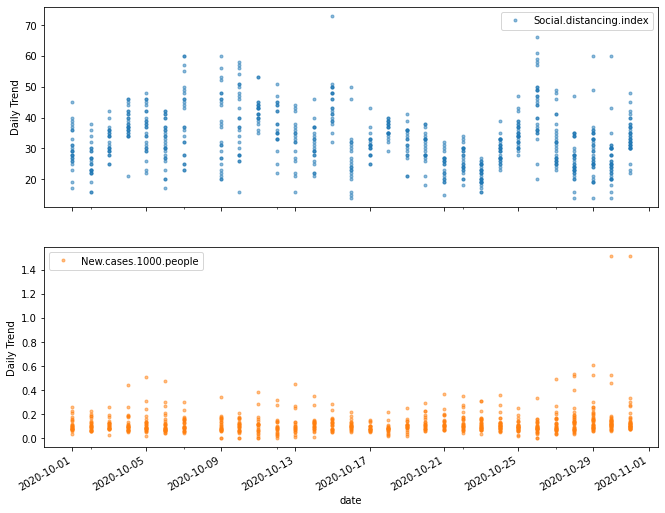

In [70]:
#social distancing columns
cols_plot = X1_cols
axes = CA_inertia_labeled_data_filtered_level3[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

#### Mobility Columns: Minimal vs. Widespread

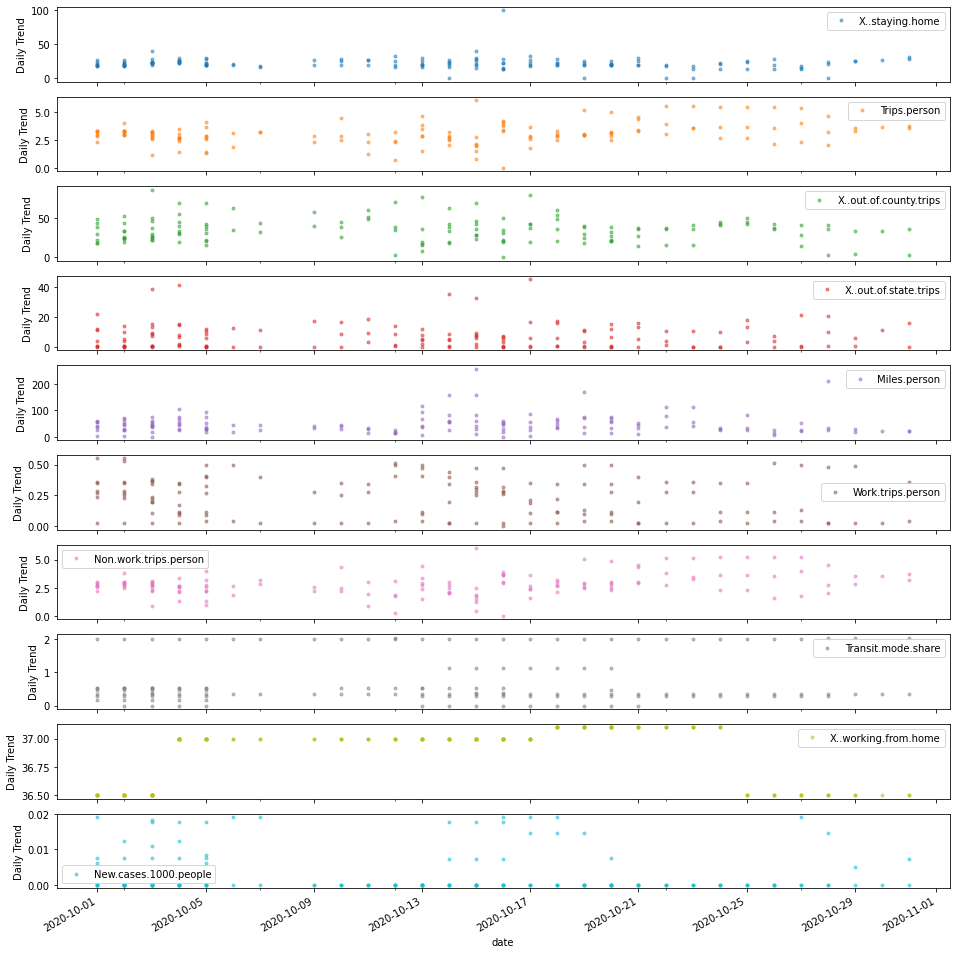

In [71]:
#mobility columns
cols_plot = X2_cols
axes = CA_inertia_labeled_data_filtered_level0[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 18), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

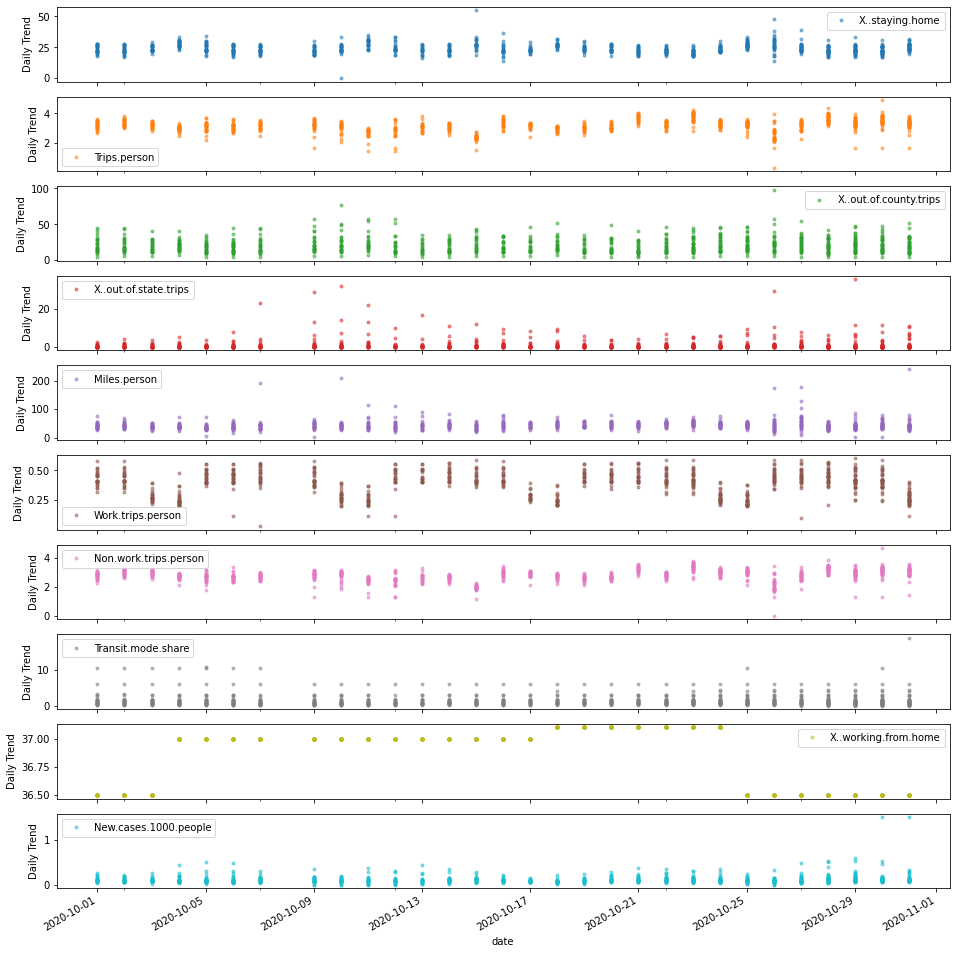

In [72]:
#social distancing columns
cols_plot = X2_cols
axes = CA_inertia_labeled_data_filtered_level3[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 18), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

### Seasonality

#### Social Distancing Columns: Minimal vs. Widespread

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

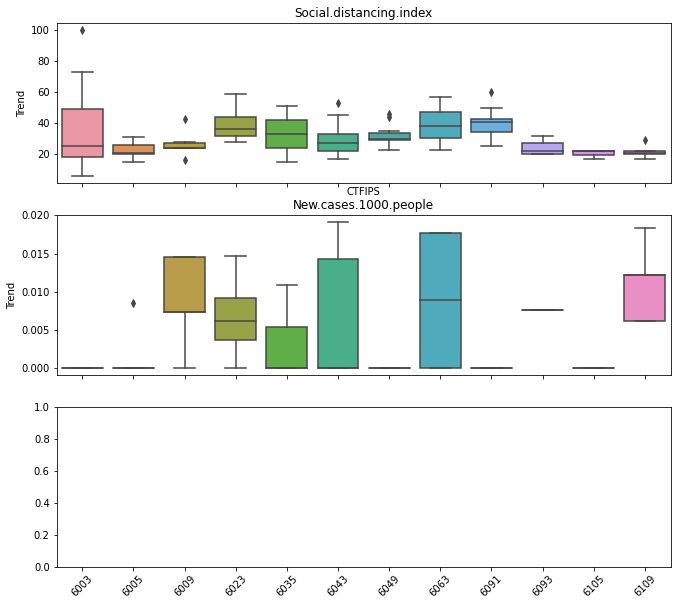

In [73]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(X1_cols, axes):
  sns.boxplot(data=CA_inertia_labeled_data_filtered_level0, x='CTFIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

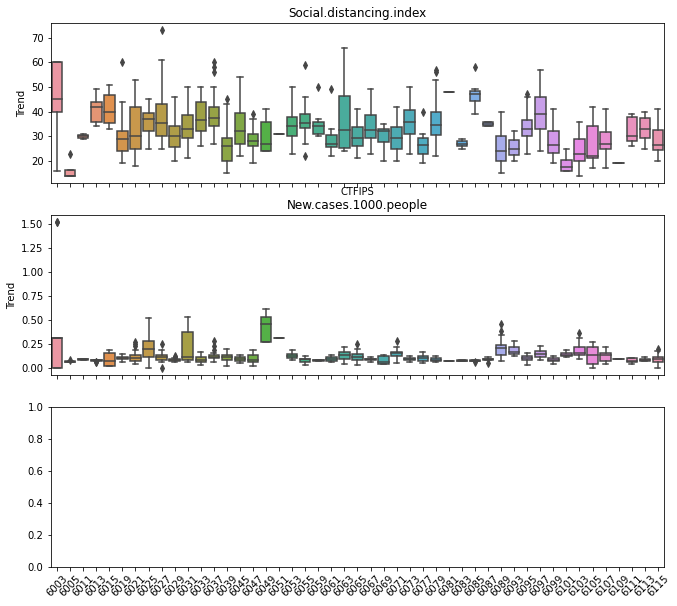

In [74]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(X1_cols, axes):
  sns.boxplot(data=CA_inertia_labeled_data_filtered_level3, x='CTFIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

#### Mobility Columns: Minimal vs. Widespread

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

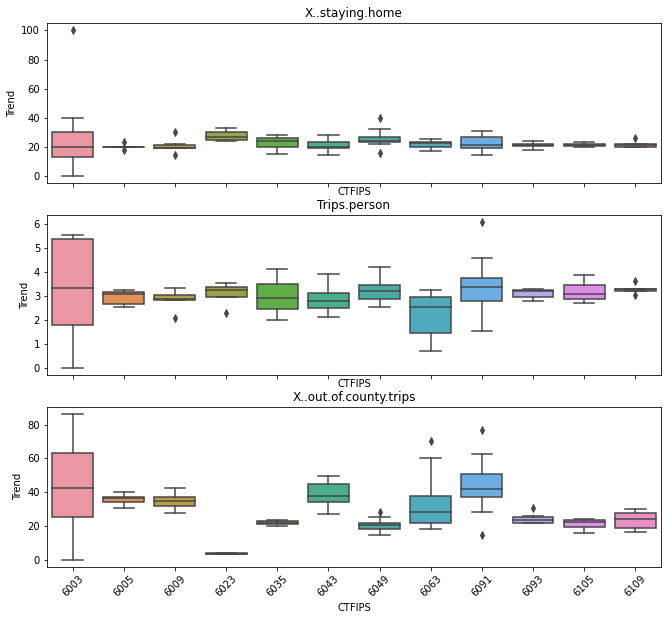

In [75]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(X2_cols, axes):
  sns.boxplot(data=CA_inertia_labeled_data_filtered_level0, x='CTFIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

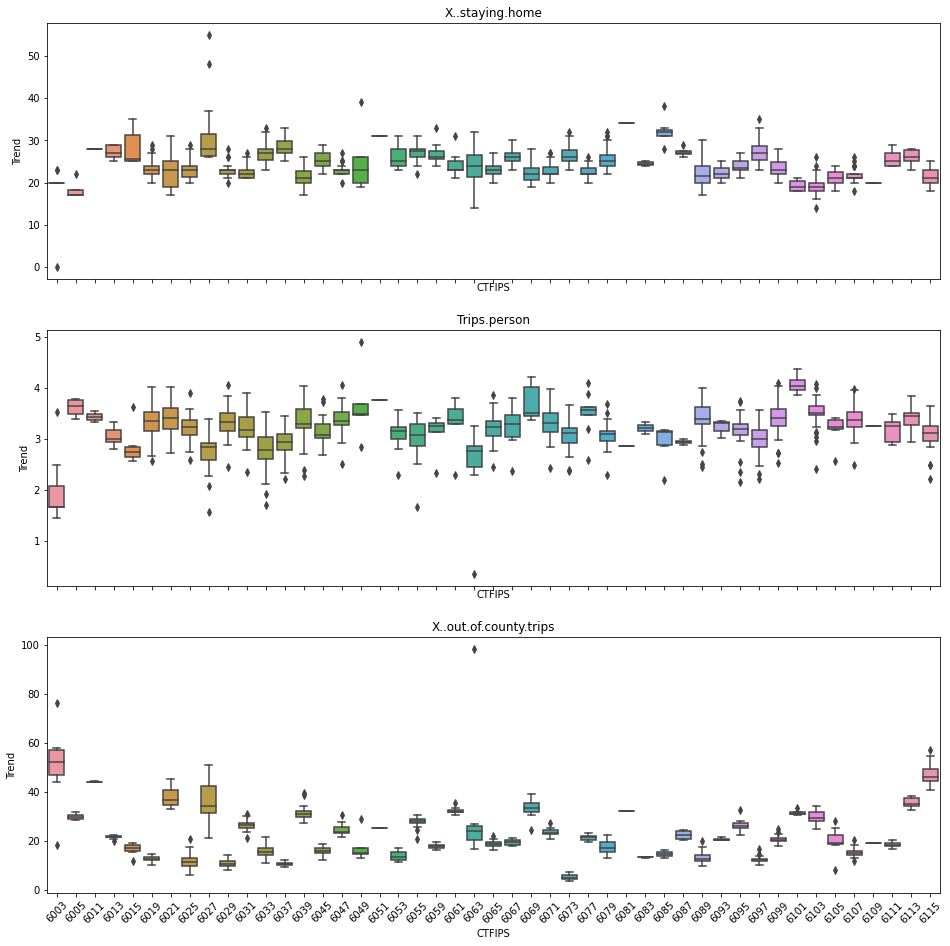

In [76]:
fig, axes = plt.subplots(3, 1, figsize=(16, 16), sharex=True)
for name, ax in zip(X2_cols, axes):
  sns.boxplot(data=CA_inertia_labeled_data_filtered_level3, x='CTFIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

### Box Plot- All county[Social.distancing.index] : Minimal vs. Widespread

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

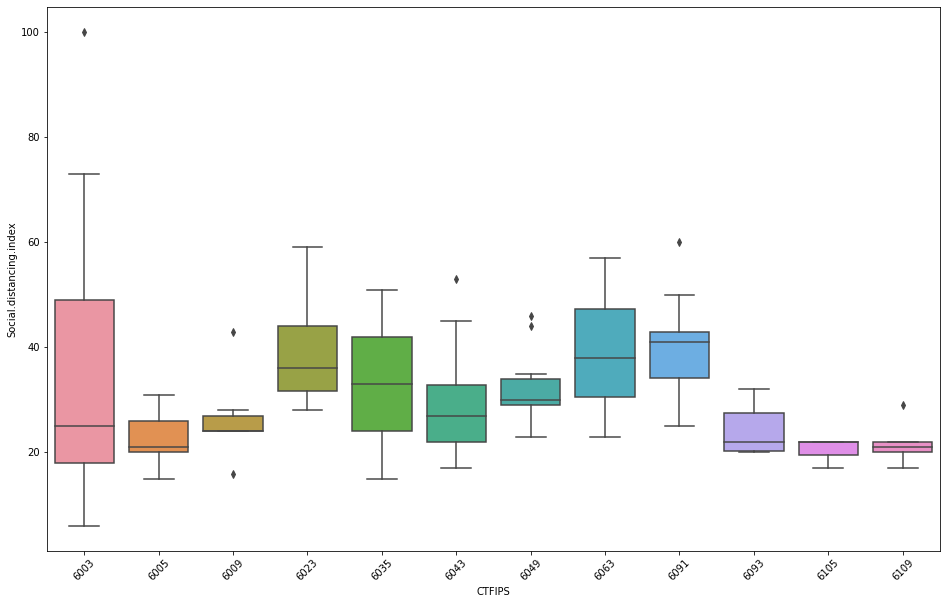

In [77]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=CA_inertia_labeled_data_filtered_level0, x='CTFIPS', y='Social.distancing.index')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

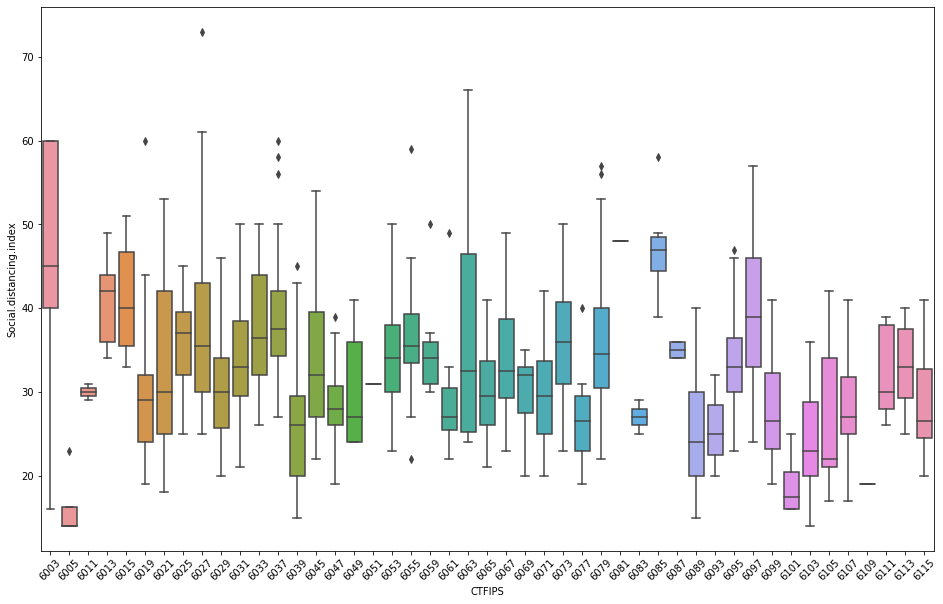

In [78]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=CA_inertia_labeled_data_filtered_level3, x='CTFIPS', y='Social.distancing.index')
plt.xticks(rotation=45)

### Resampling- All County[Social.distancing.index] 

In [79]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = X1_cols
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = CA_combined_data_filtered_new[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Social.distancing.index,New.cases.1000.people
date,,
2020-10-04,32.349138,0.069143
2020-10-11,38.396552,0.070416
2020-10-18,35.669951,0.060231


(array([737703., 737707., 737711., 737715., 737719., 737723., 737727.,
        737730.]), <a list of 8 Text major ticklabel objects>)

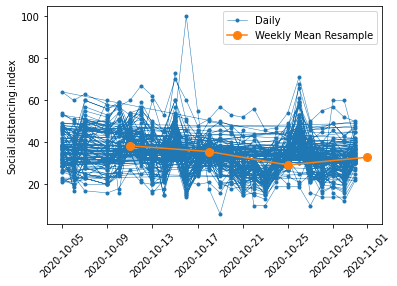

In [80]:
# Start and end of the date range to extract
start, end = '2020-10-05', '2020-12-10'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(CA_combined_data_filtered_new.loc[start:end, 'Social.distancing.index'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Social.distancing.index'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Social.distancing.index')
ax.legend();
plt.xticks(rotation=45)

In [81]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = CA_combined_data_filtered_new[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Social.distancing.index,New.cases.1000.people
date,,
2020-10-31,58696,132.8148


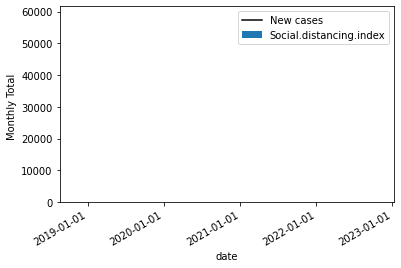

In [82]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_monthly['New.cases.1000.people'], color='black', label='New cases')
opsd_monthly[['Social.distancing.index']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total ');